# Random Forest (sklearn) vs XGBoost

## sklearn.ensemble.RandomForestClassifier

In [1]:
from sklearn import ensemble , model_selection, metrics 
from sklearn.model_selection import learning_curve

import numpy as np
import pandas as pd
import xgboost as xgb
import catboost
import lightgbm as lgbm

import warnings
warnings.filterwarnings('ignore')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализованы.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [3]:
bioresponce = pd.read_csv('../seminar01/bioresponse.csv', header=0, sep=',')

In [4]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:, 1:]

## Зависимость качества от количества деревьев

### RandomForestClassifier

In [6]:
n_trees = [1] + list(range(5, 55, 5))

In [7]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(
        estimator, bioresponce_data, bioresponce_target, 
        scoring = 'accuracy', cv = 3
    )    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 14.8 s, sys: 1.18 s, total: 16 s
Wall time: 16.2 s


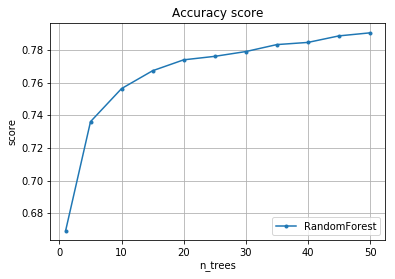

In [8]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right');

### XGBoost

In [9]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=n_tree)
    score = model_selection.cross_val_score(
        estimator, bioresponce_data, bioresponce_target,
        scoring = 'accuracy', cv = 3
    )    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 3min 4s, sys: 3.42 s, total: 3min 7s
Wall time: 3min 7s


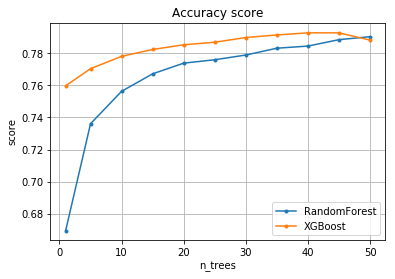

In [10]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

## Опциональная задача

Постарайтесь разобраться, почему Xgboost с самого первого дерева лучше Random Forest. 

Можно начать с того, чтобы попробовать поменять параметры моделей. Стоит заметить, что причин может быть несколько.

#### **Материалы по xgboost:**
python api: http://xgboost.readthedocs.org/en/latest/python/python_api.html

### Catboost

In [11]:
%%time
catboost_scoring = []
for n_tree in n_trees:
    estimator = catboost.CatBoostClassifier(max_depth=6, n_estimators=n_tree, verbose=False)
    score = model_selection.cross_val_score(
        estimator, bioresponce_data, bioresponce_target,
        scoring = 'accuracy', cv=3
    ) 
    catboost_scoring.append(score)
catboost_scoring = np.asmatrix(catboost_scoring)

CPU times: user 6min 44s, sys: 24.5 s, total: 7min 9s
Wall time: 2min 52s


#### **Материалы по Catboost:**
python api: https://tech.yandex.com/catboost/doc/dg/concepts/python-quickstart-docpage/

### LightGMB

In [12]:
%%time
lgbm_scoring = []
for n_tree in n_trees:
    estimator = lgbm.LGBMClassifier(learning_rate=0.5, max_depth=6, n_estimators=n_tree)
    score = model_selection.cross_val_score(
        estimator, bioresponce_data, bioresponce_target,
        scoring='accuracy', cv=3
    )    
    lgbm_scoring.append(score)
lgbm_scoring = np.asmatrix(lgbm_scoring)

CPU times: user 47.1 s, sys: 2.2 s, total: 49.3 s
Wall time: 49.9 s


#### **Материалы по LightGMB:**
https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api

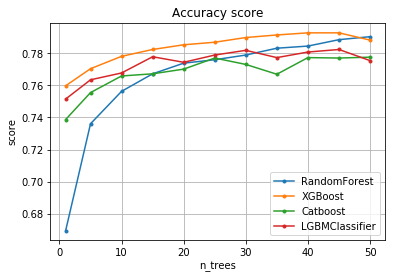

In [13]:
pylab.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='XGBoost')
pylab.plot(n_trees, catboost_scoring.mean(axis=1), marker='.', label='Catboost')
pylab.plot(n_trees, lgbm_scoring.mean(axis=1), marker='.', label='LGBMClassifier')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right');

## Опциональная задача

Проведите аналогичное сравнение на данных HR.csv 